# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 15

## Problem 1a

First let's set things up for business. 

In [1]:
import sys
sys.path.insert(0,'/Users/ltauxe/Programs/PmagPy/GIT/PmagPy')  # change this to your PmagPy path
import ipmag,pmag
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt

## Problem 1a

Just follow the instructions!

## Program 1b

So let's try out strip_magic.py.  

In [3]:
!strip_magic.py -h


    NAME 
        strip_magic.py

    DESCRIPTION
        plots various parameters versus depth or age

    SYNTAX
        strip_magic.py [command line optins]

    OPTIONS
        -h prints help message and quits
        -f FILE: specify input magic format file from magic,default='pmag_results.txt'
         supported types=[pmag_specimens, pmag_samples, pmag_sites, pmag_results, magic_web]
        -obj [sit,sam,all]: specify object to site,sample,all for pmag_result table, default is all
        -fmt [svg,png,jpg], format for images - default is svg
        -x [age,pos]:  specify whether age or stratigraphic position
        -y [dec,inc,int,chi,lat,lon,vdm,vadm]
           (lat and lon are VGP lat and lon)
        -Iex: plot the expected inc at lat - only available for results with lat info in file
        -ts TS amin amax: plot the GPTS for the time interval between amin and amax (numbers in Ma)
           TS: [ck95, gts04] 
        -mcd method_code, specify method code, default is 

Because this notebook is  not in the directory with the data in it, I have to specify the input file. 

In [5]:
!strip_magic.py -f Chapter_15/pmag_results.txt

available objects for plotting:  ['all']
available X plots:  ['age', 'pos']
available Y plots:  ['lon', 'dec', 'int', 'lat', 'inc']
available method codes:  ['LP-PI-IRM', 'LP-PI-REL']


This time for real.  

In [8]:
!strip_magic.py -f Chapter_15/pmag_results.txt -x pos -y inc -Iex\
     -mcd LP-PI-REL -sav -fmt png

1  saved in  strat.png


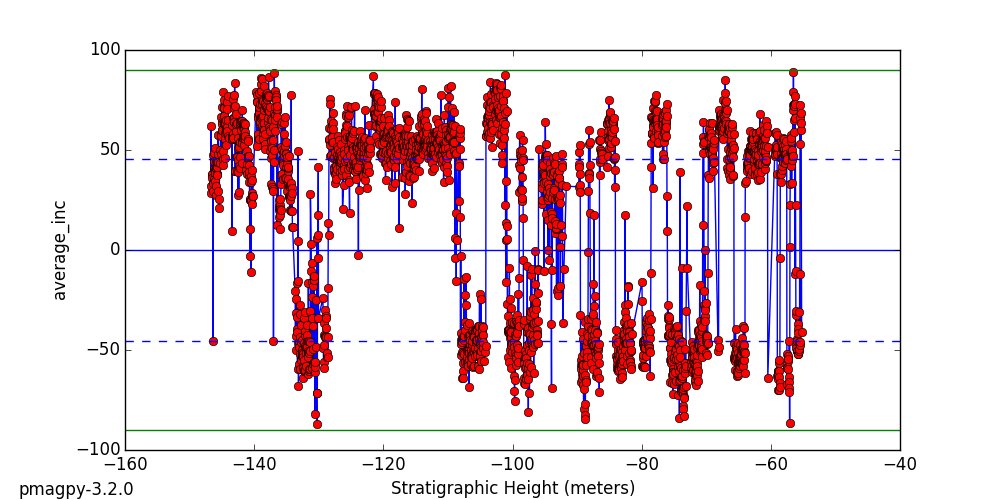

In [9]:
Image(filename="strat.png")

To get the expected inclination, I use the dipole formula for a latitude of 26$^{\circ}$.

In [12]:
lat=np.radians(26)  # remember to change to radians. 
print 'Expected inclination at 26 degrees latitude: ','%7.1f'%(np.degrees(np.arctan(2.*np.tan(lat)))) # and back

Expected inclination at 26 degrees latitude:     44.3


These data look much steeper than that.  Why?  well it isn't inclination shallowing!  As these data are on the African plate and are Oligocene in age, maybe the plate moved North. 

## Problem 1c:

We are asked to plot VGP latitude versus age and plot the magnetic timescale for the Oligocene.   I went to the stratigraphy.org website and downloaded this neat figure from which I learned that the Oligocene lasted from about 34 to 23 Ma.   

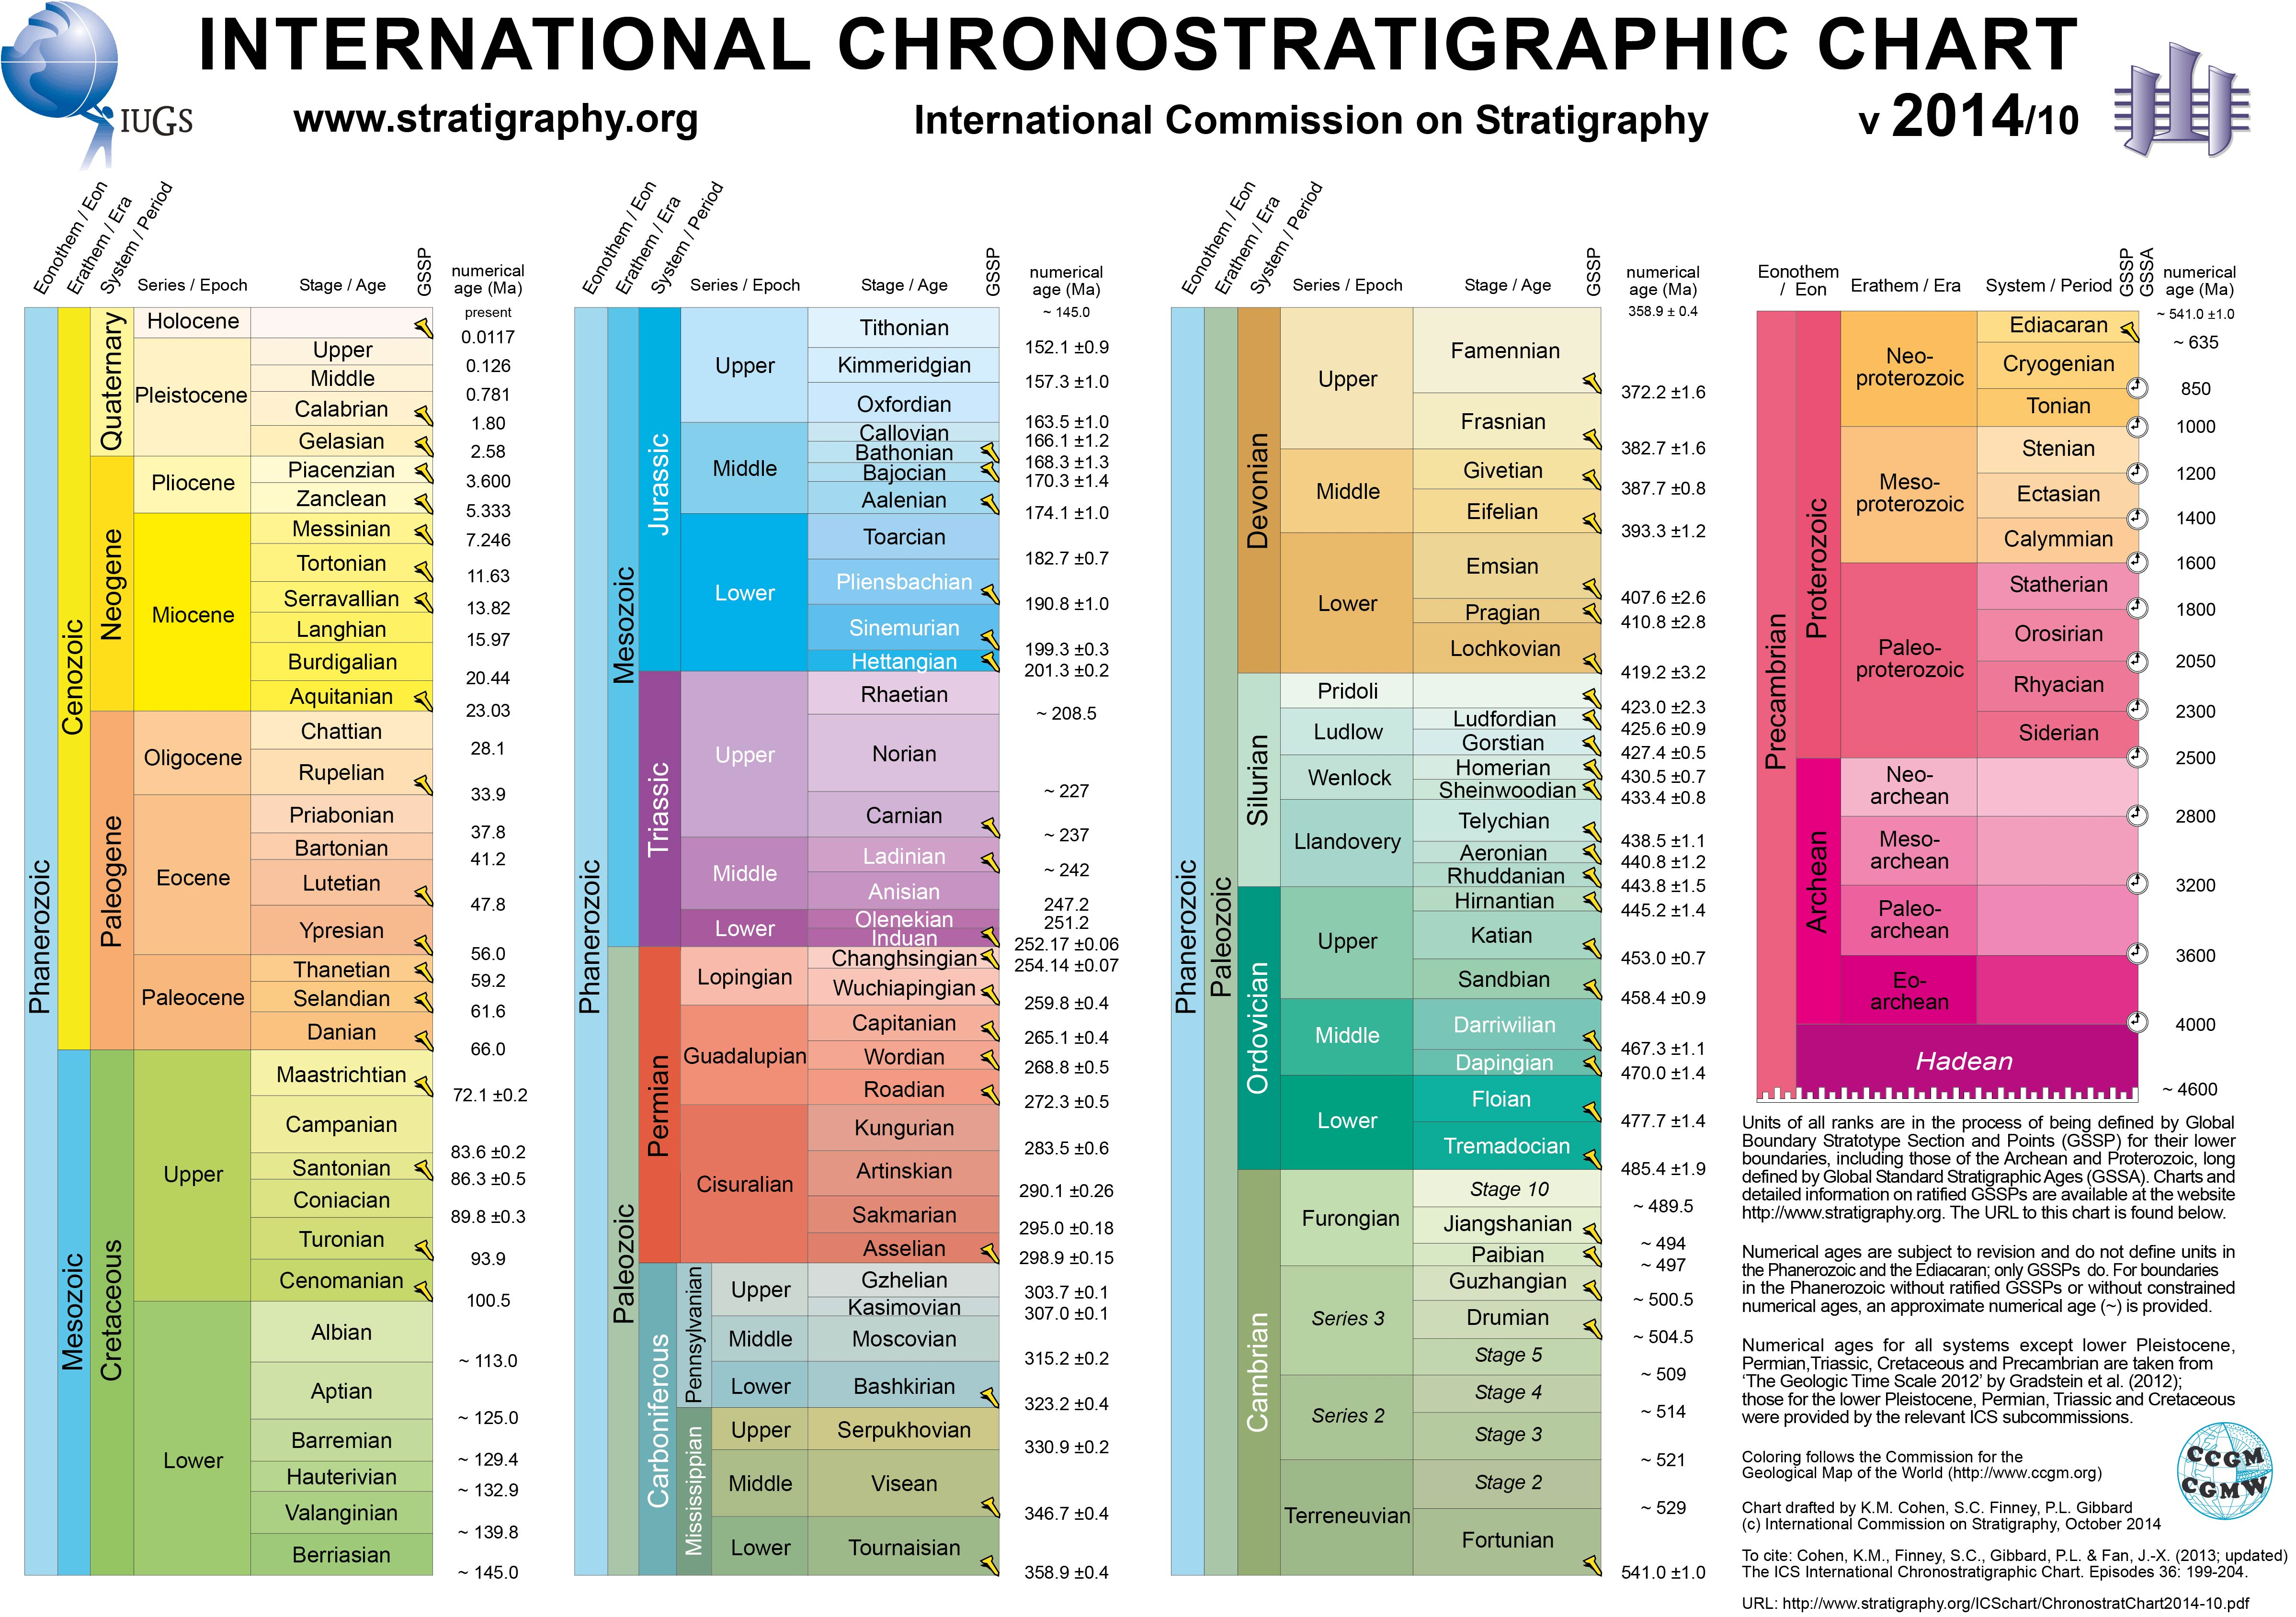

In [13]:
Image(filename='ChronostratChart2014-10.jpg')

So now I modify my call to strip_magic.py to plot VGPs versus age and the time scale from 23 to 34 Ma.

In [12]:
!strip_magic.py -f Chapter_15/pmag_results.txt -x pos -y lat -Iex -mcd LP-PI-REL -sav -fmt png -ts gts04 23 34

1  saved in  strat.png
2  saved in  ts.png


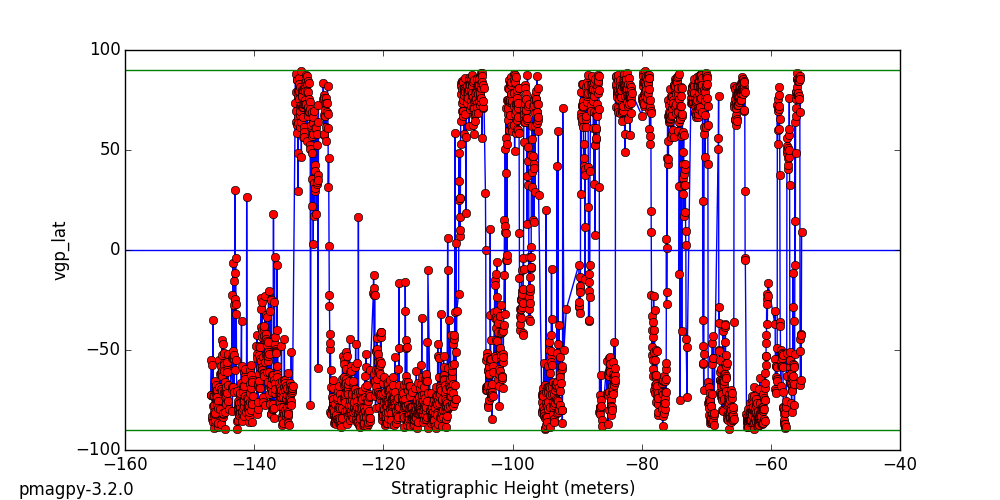

In [13]:
Image(filename="strat.png")

Well the two plots are backwards as far as time goes, but I think the age range is from around the middle of Chron C13r to somewhere in C6C.

In [2]:
!strip_magic.py -f Chapter_15/pmag_results.txt -x age -y lat -mcd LP-PI-REL -sav -fmt png

Unsupported file type, try again


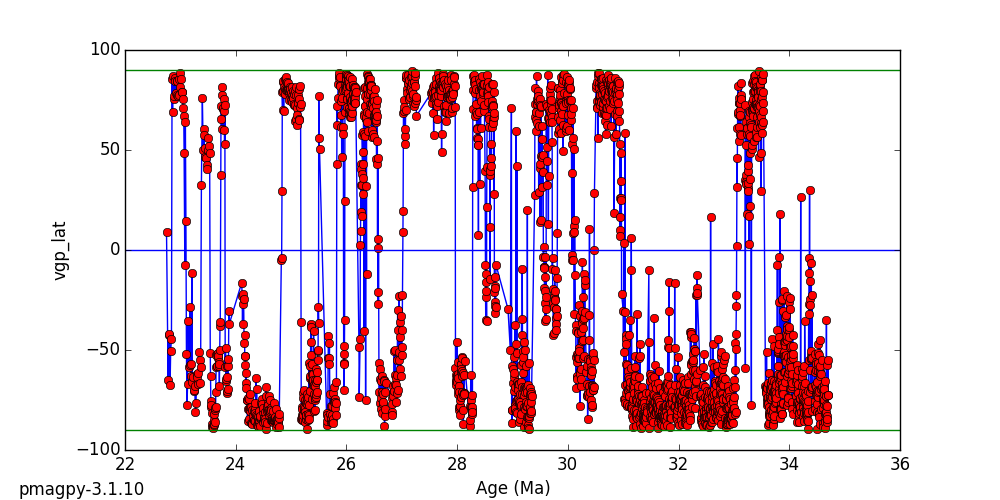

In [21]:
Image(filename="strat.png")

Yup.  And I'm going to replot this using the other time scale (ck95) to see if the ages match better. 

In [26]:
!strip_magic.py -f Chapter_15/pmag_results.txt -x pos -y lat -mcd LP-PI-REL -sav -fmt png -ts ck95 23 34

1  saved in  strat.png
2  saved in  ts.png


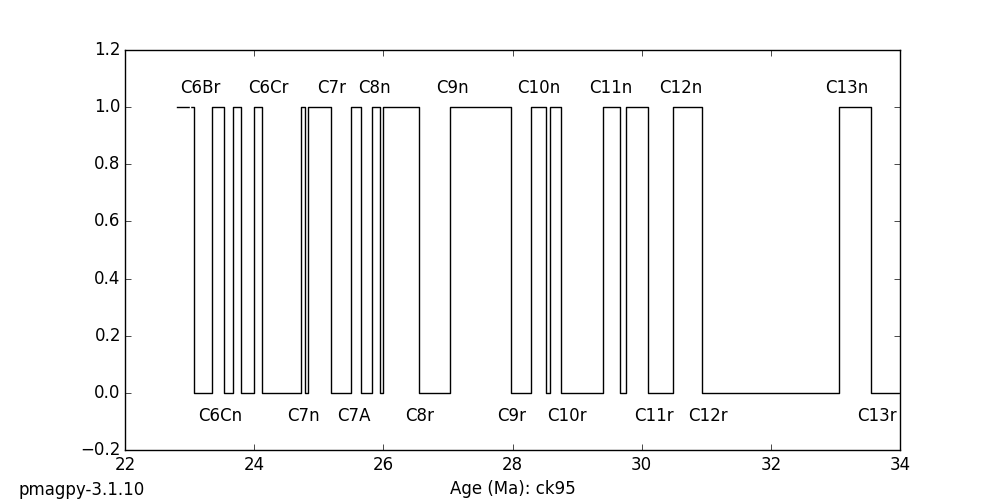

In [27]:
Image(filename="ts.png")

And yes, the CK95 timescale works better.  As this paper was published in 1997, it is highly doubtful that the authors used GTS04 as that didn't exist yet.  

## Problem 2a

Now we need to read the data into a Pandas Dataframe and figure out how to plot them. At this point in the class I have figure out that the MagIC format is tab delimited and has the header in the second row.  

In [32]:
data=pd.read_csv("Chapter_15/pmag_results.txt", sep='\t',header=1)
data.columns

Index([u'average_age', u'average_age_unit', u'average_dec', u'average_height', u'average_inc', u'average_int_rel', u'average_lat', u'average_lon', u'data_type', u'er_analyst_mail_names', u'er_citation_names', u'er_location_names', u'er_sample_names', u'er_site_names', u'er_specimen_names', u'magic_method_codes', u'pmag_result_name', u'vgp_lat', u'vgp_lon'], dtype='object')

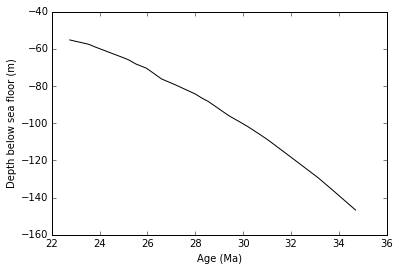

In [38]:
plt.plot(data['average_age'].values,data['average_height'],'k-')
plt.ylabel('Depth below sea floor (m)')
plt.xlabel('Age (Ma)')

## Problem 2b

To get average sedimentation rate, I need to subtract the top and bottom meter levels and divide by the top and bottom age.

In [45]:
DepthRange=np.max(-data['average_height'])-np.min(-data['average_height'])
AgeRange=np.max(data['average_age'])-np.min(data['average_age'])
print 'Average sediment accumulation rate was: ','%7.1f'%(DepthRange/AgeRange), 'm/myr'

Average sediment accumulation rate was:      7.7 m/myr


It gets higher down core.  

## Problem 2c

When the ridge crest is shallow, it is much above the Carbonate Compensation Depth (CCD). As the crust ages, it sinks and carbonate dissolution increases.  Also, the CCD was higher in the Miocene in general, so there are probably climatic reasons as well. 

## Problem 2d

So this is a tricky question.  If we use inclination only, we need to call on incfish.py to calculate the average inclination.   

In [46]:
!incfish.py -h


    NAME
       incfish.py

    DESCRIPTION
       calculates fisher parameters from inc only data

    INPUT FORMAT
       takes inc data 

    SYNTAX
       incfish.py [options]  [< filename]

    OPTIONS
        -h prints help message and quits
        -i for interactive filename entry
        -f FILE, specify input file name
        -F FILE, specify output file name
        < filename for reading from standard input
   
    OUTPUT
       mean inc,Fisher inc, N, R, k, a95

    NOTES
        takes the absolute value of inclinations (to take into account reversals),
        but returns gaussian mean if < 50.0, because of polarity ambiguity and 
        lack of bias.

    


So we need to save the inclination data to a file and then use incfish.py on it.  

In [51]:
Incs=np.array(data['average_inc'].values)
np.savetxt('522.incs',Incs)
!incfish.py -f 522.incs

   50.0    52.7  2332   2177.4    15.1     1.0


But someone may have oriented the declination data.... 

In [52]:
!strip_magic.py -f Chapter_15/pmag_results.txt -x pos -y dec -mcd LP-PI-REL -sav -fmt png

1  saved in  strat.png


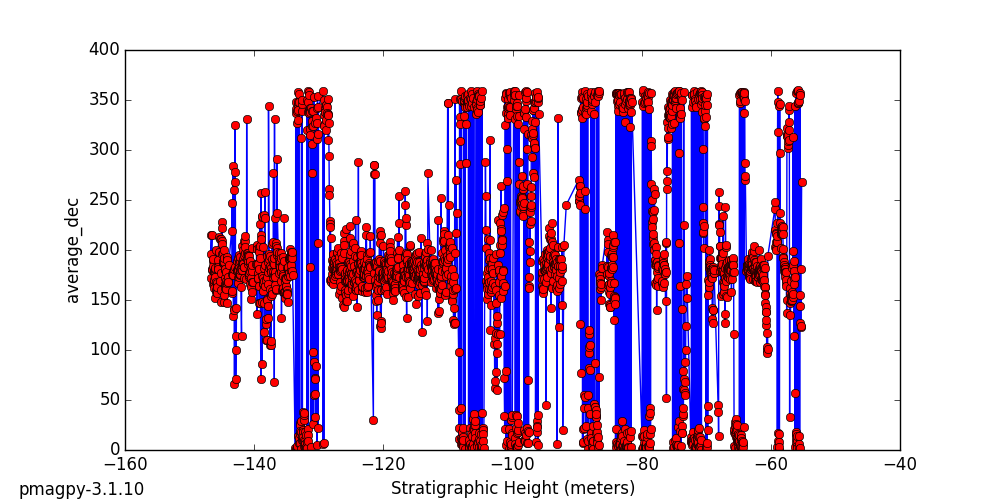

In [53]:
Image(filename="strat.png")

And yup they did.  So we can save the declination,inclination data and run our old favorite, goprinc.py. (We can't use gofish without separating data by polarity and I'm feeling lazy.) 

In [58]:
DIs=np.array([data['average_dec'].values,data['average_inc'].values]).transpose()
np.savetxt('522.di',DIs)
!goprinc.py -f 522.di

0.85596   180.0    53.5 0.08148   352.7    36.2 0.06256    85.3     3.5 2332


So the principle inclination is 53.5 and the incfish estimate was 52.7.  Not bad.  But now we need to calculate the paleolatitude from the inclination - the opposite of what we did in Problem 1b.  

In [59]:
inc=np.radians(53)  # remember to change to radians. 
print 'Paleolatitude for inclination of 53: ','%7.1f'%(np.degrees(np.arctan(np.tan(inc)/2.)))

Paleolatitude for inclination of 53:     33.6
